In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [13]:
a = np.loadtxt('EDGES_data.txt', unpack=True)
frequency = a[0, :]
x = frequency
data = a[1, :]
y = data
nu_c=75.0

In [14]:
def AIC(r2, k):
    Se = np.sum( (r2/0.025)**2 )
    L = np.exp( - Se / 2 )
    return - 2 * np.log( L ) + 2*k 

def BIC(r2,k):
    n = 103
    Se = np.sum( (r2/0.025)**2)
    L = np.exp( - Se / 2 )
    return - 2 * np.log( L ) +  k * np.log(n)

def f(x,a,b,c,d,e):
    return a * ( x / nu_c )**-2.5 + b * ( x / nu_c )**-2.5 * np.log( x / nu_c ) \
                        + c * ( x / nu_c )**-2.5 * (np.log(x / nu_c))**2 \
                        + d * ( x / nu_c )**-4.5 + e * ( x / nu_c )**-2

def sin_model( x, V, a0, a1, P ):
    T_cal = ( x / nu_c ) ** V *  ( (10**a0) * np.sin( 2 * np.pi * x / P) + (10**a1) * np.cos( 2 * np.pi * x / P )) 
    return T_cal

def GSmodel(x, A, w, nu_0):
    T_21 = -A * np.e ** ( -4 * np.log(2) * ( x - nu_0 ) **2 / w **2 )
    return T_21
    
def FGSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21

def fgs(x, a, b, c, d, e, p0, p1, p2, p3, V, a0, a1, P):
    return f( x, a, b, c, d, e ) + FGSmodel(x, p0, p1, p2, p3) + sin_model( x, V, a0, a1, P )
  

def f_G_s(x, a, b, c, d, e, A, w, nu_0, V, a0, a1, P ):
    return f(x, a,b,c,d,e) + GSmodel(x, A, w, nu_0) + sin_model( x, V, a0, a1, P )

def f_s(x, a, b, c, d, e, V, a0, a1, P ):
    return f( x, a, b, c, d, e ) + sin_model( x, V, a0, a1, P )

def f_g(x, a, b, c, d, e, p0, p1, p2, p3):
    return f(x, a,b,c,d,e) + FGSmodel(x, p0, p1, p2, p3)

In [15]:
p_init = np.array(
    [-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03
     ,0.434, 7.83884244e+01, 19.132, 12.64
     ]
)
p_init2 = np.array(
    [-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03
     ,2.43169630e-01, 7.83884244e+01, 1.91511501e+01, 1.18670823e+01,
     -2.63, -1.45, -8.49, 12.44,
     ]
)
p_init3 = np.array(
    [-5.88404512e+03, -3.73866143e+03, -1.16478763e+03, 7.93874947e+01, 7.55530591e+03
     ,3.91699302e+00, 15.10356811e+00,  7.3336946e+01,
     -2.63, -1.45, -8.49, 12.44,]
)
p_init4 = np.array(
    [-1.63983624e+04, -8.58318213e+03, -2.80775678e+03,  2.44384021e+02, 1.79056757e+04,
     -2.63, -1.45, -8.49, 12.44,
    ]
)

model_1, rms = 26.910043656480752mK, AIC = 137.33999409304175, BIC = 161.05255498710846
model3,rms = 26.142128411220874mK, AIC = 138.6261126727719, BIC = 172.87758951975718
model4,rms = 35.150381039542125mK, AIC = 227.61852253468035, BIC = 259.235270393436


/Users/daiki/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


model2,rms = 36.84955568202786mK, AIC = 241.78023145308134, BIC = 265.49279234714805


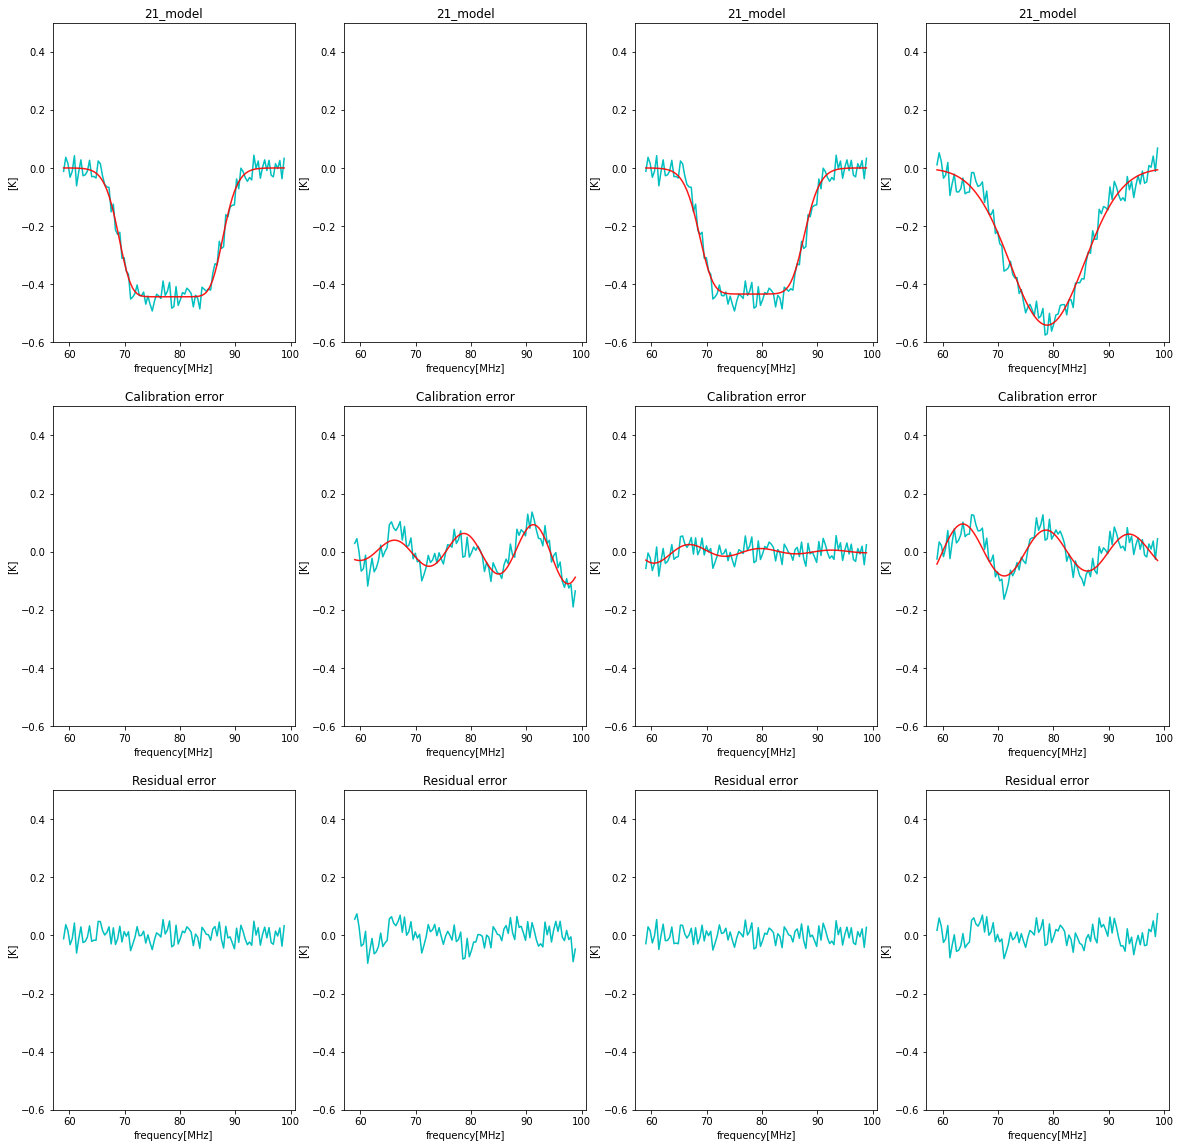

In [17]:
bounds=( [ -7000, -5000, -1300, 50, 5000,
        0 , 60, 5, 0
         ],
        [  -4000, -3000 , -900, 100, 9000,
         1, 85, 40, 40
        ]
          )
#1
Fit_y, cov = curve_fit(f_g, frequency, data, p0=p_init, maxfev=1000000, bounds=bounds)
p_init = Fit_y
fig = plt.figure(figsize=(20,20))
y_min = -.6
y_max = .5

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4])

ax = fig.add_subplot(341)
ax.set_ylim(y_min, y_max)
ax.set_title('21_model')
ax.plot(frequency, r1, c = 'c')
ax.plot(frequency,  FGSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8]), c = 'r' , alpha = 0.9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")


ax = fig.add_subplot(345)
ax.set_ylim(y_min, y_max)
ax.set_title('Calibration error')
ax.plot(frequency, data , color = 'c', alpha = 0)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r3 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - FGSmodel(frequency, Fit_y[5], Fit_y[6] , Fit_y[7], Fit_y[8] )

ax = fig.add_subplot(349)
ax.set_ylim(y_min, y_max)
ax.set_title('Residual error')
ax.plot(frequency, r3, label="fit" , color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

print("model_1, rms = {}mK, AIC = {}, BIC = {}".format( ( np.mean(r3**2) )**0.5 * 1000, AIC( r3,k =  9 ), BIC(r3,k=9)) )

# ============================================================================================================================

bounds=( [ -7000, -5000, -1300, 50, 5000,
        0 , 60, 0, 
          -4, -10, -10, -10 
         ],
        [  -4000, -3000 , -900, 100, 9000,
         1, 85, 40,
         4, 10, 10, 15
        ]
          )
#2
Fit_y, cov = curve_fit(fgs, frequency, data, p0=p_init2, maxfev=1000000) #bounds=bounds
p_init2 = Fit_y

ax = fig.add_subplot(343)
ax.set_ylim(y_min, y_max)
ax.set_title('21_model')
ax.plot(frequency, r1, c = 'c')
ax.plot(frequency, FGSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8]) , c = 'r' , alpha = .9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - FGSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8])

ax = fig.add_subplot(347)
ax.set_ylim(y_min, y_max)
ax.set_title('Calibration error')
ax.plot(frequency, r2, c = 'c')
ax.plot(frequency, sin_model(frequency, Fit_y[9], Fit_y[10], Fit_y[11], Fit_y[12]), c = 'r', alpha = .9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r3 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - FGSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8])\
-sin_model(frequency, Fit_y[9], Fit_y[10], Fit_y[11], Fit_y[12])

ax = fig.add_subplot(3,4,11)
ax.set_ylim(y_min, y_max)
ax.set_title('Residual error')
ax.plot(frequency, r3, color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

print("model3,rms = {}mK, AIC = {}, BIC = {}".format( ( np.mean(r3**2) )**0.5 * 1000, AIC( r3,k =  13 ), BIC(r3,k=13)) )

# ============================================================================================================================

bounds3=( [ -7000, -5000, -1300, 50, -1000,
        0 , 5, 60,
          -4, -10, -10, 10
         ],
        [  -4000, -3000 , -900, 100, 9000,
         10, 40, 85,
         4, 2, 2, 15
        ])

#3
Fit_y, cov = curve_fit(f_G_s, frequency, data, p0=p_init3, maxfev=1000000, bounds=bounds3)
p_init3 = Fit_y

r1 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4])- sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])
ax = fig.add_subplot(344)
ax.set_ylim(y_min, y_max)
ax.set_title('21_model')
ax.plot(frequency, r1, c = 'c')
ax.plot(frequency,  GSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7]), c = 'r' , alpha = 0.9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - GSmodel(frequency, Fit_y[5], Fit_y[6], Fit_y[7])

ax = fig.add_subplot(348)
ax.set_ylim(y_min, y_max)
ax.set_title('Calibration error')
ax.plot(frequency, r2, label="fit" , color = 'c')
ax.plot(frequency, sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11]), c = 'r', alpha = .9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r3 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - GSmodel(frequency, Fit_y[5], Fit_y[6] , Fit_y[7] )\
- sin_model(frequency, Fit_y[8], Fit_y[9], Fit_y[10],Fit_y[11])

ax = fig.add_subplot(3,4,12)
ax.set_ylim(y_min, y_max)
ax.set_title('Residual error')
ax.plot(frequency, r3, color = 'c')
ax.set_xlabel("frequency[MHz]")

ax.set_ylabel("[K]")

print("model4,rms = {}mK, AIC = {}, BIC = {}".format( ( np.mean(r3**2) )**0.5 * 1000, AIC( r3,k =  12 ), BIC(r3,k=12)) )

# ============================================================================================================================

bounds4=( [ -1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,-1.0e+6 ,
         -4 , -10, -10, 10
         ],
        [ 1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,1.0e+6 ,
          4, 2, 2, 15
        ]
          )

#4
Fit_y, cov = curve_fit(f_s, frequency, data, p0=p_init4, maxfev=1000000, bounds=bounds4)
p_init4 = Fit_y

ax = fig.add_subplot(342)
ax.set_ylim(y_min, y_max)
ax.set_title('21_model')
ax.plot(frequency, r2*0, c = 'c', alpha = 0)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")


r2 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4])

ax = fig.add_subplot(346)
ax.set_ylim(y_min, y_max)
ax.set_title('Calibration error')
ax.plot(frequency, r2, c = 'c')
ax.plot(frequency, sin_model(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8]), c = 'r', alpha = .9)
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

r3 = data - f(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4]) - sin_model(frequency, Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[8])

ax = fig.add_subplot(3,4,10)
ax.set_ylim(y_min, y_max)
ax.set_title('Residual error')
ax.plot(frequency, r3, color = 'c')
ax.set_xlabel("frequency[MHz]")
ax.set_ylabel("[K]")

fig.savefig("matome.png")
print("model2,rms = {}mK, AIC = {}, BIC = {}".format( ( np.mean(r3**2) )**0.5 * 1000, AIC( r3,k =  9 ), BIC(r3,k=9)) )
fig.savefig("matome.png")
plt.show()

In [436]:
def f1(x, d0, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + FGSmodel(x, p0, p1, p2, p3)

def f2(x, d0, d1, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f3(x, d0, d1, d2, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)+ FGSmodel(x, p0, p1, p2, p3)


def f4(x, d0, d1, d2, d3, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + FGSmodel(x, p0, p1, p2, p3)

def f5(x, d0, d1, d2, d3, d4, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f6(x, d0, d1, d2, d3, d4, d5, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f7(x, d0, d1, d2, d3, d4, d5, d6, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f8(x, d0, d1, d2, d3, d4, d5, d6,d7, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5) + d7 * ( x / nu_c )**(7-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f9(x, d0, d1, d2, d3, d4, d5, d6,d7,d8, p0, p1, p2, p3):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5) + d7 * ( x / nu_c )**(7-2.5) + d8 * ( x / nu_c )**(8-2.5) + FGSmodel(x, p0, p1, p2, p3)



def FGSmodel(x, p0, p1, p2, p3):
    A_21 = p0
    nu_21 = p1
    w_21 = p2
    tau_21 = p3
    B_21 = 4 * np.power(x-nu_21,2) /w_21/w_21 \
        * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
    T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
    return T_21



In [437]:
p_init1 = np.array(
    [ 1.75706132e+03,
     -3.38557117e-01, -2.32255488e-03,  7.16581716e-02, 1.30683008e+01
    ]
)
p_init2 = np.array(
    [ 1.86824775e+03, -1.17799148e+02, -3.38557117e-01, -2.32255488e-03,
  7.16581716e-02,  1.30683008e+01]
)
p_init3 = np.array(
    [1.78912855e+03,  1.33183403e+02, -2.74532148e+02 
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
p_init4 = np.array(
    [1.78912855e+03,  1.33183403e+02, -2.74532148e+02,  1.15277847e+02
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
p_init5 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03,  
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01]
)

p_init6 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, 1.08517300e+02,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01]
)

p_init7 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -5.19280662e+03,  8.45176327e+02,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01]
)

p_init8 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -2.32786390e+03, -1.66720548e+01,  1.10176505e+02,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01]
)

p_init9 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -2.68600221e+04, -7.34092076e+03,  7.46610521e+03,-1.52754301e+03,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01]
)

SyntaxError: invalid syntax (<ipython-input-437-9257beebc6cb>, line 40)

In [438]:
bounds=( [ -7000, 7000, 7000, -7000, -7000,
        0 , 60, 5, 0
         ],
        [  7000, 7000 , 7000, 7000, 7000,
         1, 85, 40, 40
        ]
          )

In [439]:
for i in range(1):
    rms_list = []
    AIC_list = []
    BIC_list = []
    fig = plt.figure(figsize=(20,5))

    Fit_y, cov = curve_fit(f1, frequency, data, p0=p_init1, maxfev=1000000) 
    p_init1 = Fit_y
    r = data - f1(frequency, Fit_y[0], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f2, frequency, data, p0=p_init2, maxfev=1000000) 
    p_init2 = Fit_y
    r = data - f2(frequency, Fit_y[0], Fit_y[1], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f3, frequency, data, p0=p_init3, maxfev=1000000) 
    p_init3 = Fit_y
    r = data - f3(frequency, Fit_y[0], Fit_y[1], Fit_y[2],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f4, frequency, data, p0=p_init4, maxfev=1000000) 
    p_init4 = Fit_y
    r = data - f4(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f5, frequency, data, p0=p_init5, maxfev=1000000) 
    p_init5 = Fit_y
    r = data - f5(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f6, frequency, data, p0=p_init6, maxfev=1000000) 
    p_init6 = Fit_y
    r = data - f6(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f7, frequency, data, p0=p_init7, maxfev=1000000) 
    p_init7 = Fit_y
    r = data - f7(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f8, frequency, data, p0=p_init8, maxfev=1000000) 
    p_init8 = Fit_y
    r = data - f8(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[7],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f9, frequency, data, p0=p_init9, maxfev=1000000) 
    p_init9 = Fit_y
    r = data - f9(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

TypeError: f1() takes 6 positional arguments but 10 were given

<Figure size 1440x360 with 0 Axes>

ValueError: x and y must have same first dimension, but have shapes (9,) and (0,)

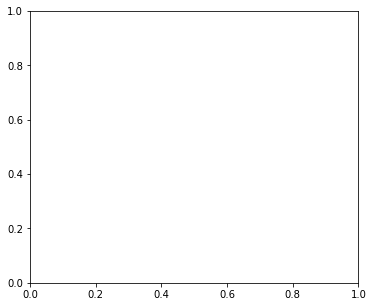

In [440]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
ax.plot(list(range(1, 10)), rms_list[:], marker = 'o', c = 'c')
ax.set_title('rms[mK]')
ax.set_xlabel('N')
ax.set_ylabel('rms[mK]')

ax = fig.add_subplot(132)
ax.plot( list(range(1, 10)) , AIC_list[:], marker = 'o', c = 'c')
ax.annotate("Minimum", xy = (5, AIC_list[5]), size = 20, xytext = (6, 800),color = "red", arrowprops = dict())
ax.set_title('AIC')
ax.set_xlabel('N')
ax.set_ylabel('AIC')

ax = fig.add_subplot(133)
ax.plot( list(range(1, 10)) , BIC_list[:], marker = 'o', c = 'c')
ax.annotate("Minimum", xy = (5, BIC_list[5]), size = 20, xytext = (6, 800),color = "red", arrowprops = dict())
ax.set_title('BIC')
ax.set_xlabel('N')
ax.set_ylabel('BIC')

fig.savefig("change n.png")

plt.show()

In [441]:
def f1(x, d0, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + FGSmodel(x, p0, p1, p2, p3) + sin_model( x, V, a0, a1, P )

def f2(x, d0, d1, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5)+ FGSmodel(x, p0, p1, p2, p3)

def f3(x, d0, d1, d2, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)+ FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )


def f4(x, d0, d1, d2, d3, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

def f5(x, d0, d1, d2, d3, d4, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5)+ FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

def f6(x, d0, d1, d2, d3, d4, d5, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)+ FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

def f7(x, d0, d1, d2, d3, d4, d5, d6, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5)+ FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

def f8(x, d0, d1, d2, d3, d4, d5, d6,d7, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5) + d7 * ( x / nu_c )**(7-2.5)+ FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

def f9(x, d0, d1, d2, d3, d4, d5, d6,d7,d8, p0, p1, p2, p3, V, a0, a1, P):
    return d0 * ( x / nu_c )**(0-2.5) + d1 * ( x / nu_c )**(1-2.5) + d2 * ( x / nu_c )**(2-2.5)\
            + d3 * ( x / nu_c )**(3-2.5) + d4 * ( x / nu_c )**(4-2.5) + d5 * ( x / nu_c )**(5-2.5)\
            + d6 * ( x / nu_c )**(6-2.5) + d7 * ( x / nu_c )**(7-2.5) + d8 * ( x / nu_c )**(8-2.5) + FGSmodel(x, p0, p1, p2, p3)+ sin_model( x, V, a0, a1, P )

In [442]:
p_init1 = np.array(
    [ 1.75706132e+03,
     -3.38557117e-01, -2.32255488e-03,  7.16581716e-02, 1.30683008e+01
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01
    ]
)
p_init2 = np.array(
    [ 1.86824775e+03, -1.17799148e+02, 
     -3.38557117e-01, -2.32255488e-03,7.16581716e-02,  1.30683008e+01
    ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
p_init3 = np.array(
    [1.78912855e+03,  1.33183403e+02, -2.74532148e+02 
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01
    ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
p_init4 = np.array(
    [1.78912855e+03,  1.33183403e+02, -2.74532148e+02,  1.15277847e+02
     ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01
    ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)
p_init5 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03,  
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01
   ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)

p_init6 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, 1.08517300e+02 ,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01
   ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)

p_init7 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -5.19280662e+03,  8.45176327e+02,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01
   ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)

p_init8 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -2.32786390e+03, -1.66720548e+01,  1.10176505e+02,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01
   ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)

p_init9 = np.array(
   [-5.88307335e+03 ,-3.73821196e+03 ,-1.16463789e+03  ,7.93729189e+01 ,7.55434871e+03, -2.68600221e+04, -7.34092076e+03,  7.46610521e+03,-1.52754301e+03,
    4.43158663e-01,  7.83885371e+01,  1.91511606e+01, 1.18679938e+01
   ,-3.38557117e-01, -2.32255488e-03,  7.16581716e-02,  1.30683008e+01]
)

In [463]:
maxfev=1000000000
for i in range(1):
    rms_list = []
    AIC_list = []
    BIC_list = []
    fig = plt.figure(figsize=(20,5))

    Fit_y, cov = curve_fit(f1, frequency, data, p0=p_init1, maxfev=100) 
    p_init1 = Fit_y
    r = data - f1(frequency, Fit_y[0], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f2, frequency, data, p0=p_init2, maxfev=maxfev) 
    p_init2 = Fit_y
    r = data - f2(frequency, Fit_y[0], Fit_y[1],Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f3, frequency, data, p0=p_init3, maxfev=maxfev) 
    p_init3 = Fit_y
    r = data - f3(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f4, frequency, data, p0=p_init4, maxfev=maxfev) 
    p_init4 = Fit_y
    r = data - f4(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])

    Fit_y, cov = curve_fit(f5, frequency, data, p0=p_init5, maxfev=maxfev) 
    p_init5 = Fit_y
    r = data - f5(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f6, frequency, data, p0=p_init6, maxfev=maxfev) 
    p_init6 = Fit_y
    r = data - f6(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f7, frequency, data, p0=p_init7, maxfev=maxfev) 
    p_init7 = Fit_y
    r = data - f7(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f8, frequency, data, p0=p_init8, maxfev=maxfev) 
    p_init8 = Fit_y
    r = data - f8(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5],Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

    Fit_y, cov = curve_fit(f9, frequency, data, p0=p_init9, maxfev=maxfev) 
    p_init9 = Fit_y
    r = data - f9(frequency, Fit_y[0], Fit_y[1], Fit_y[2], Fit_y[3], Fit_y[4], Fit_y[5], Fit_y[6], Fit_y[7], Fit_y[8], Fit_y[-8], Fit_y[-7], Fit_y[-6], Fit_y[-5], Fit_y[-4], Fit_y[-3], Fit_y[-2], Fit_y[-1])
    make_list(r , Fit_y.shape[0])
    print(Fit_y)

[ 1.87177931e+03 -1.90271063e+02  1.90294807e+02 -1.74950920e+02
  5.40953459e+01  7.58232541e-01  7.84468444e+01  1.92126425e+01
  5.26354745e+00  8.28301175e+00 -6.27653028e-03  7.44168265e-04
  1.10661124e+01]
[ 2.22842139e+03 -2.19334353e+03  4.60855082e+03 -4.95212527e+03
  2.58330761e+03 -5.24544908e+02  6.72634631e-02  7.89560746e+01
  1.71591170e+01  1.48380590e+07 -2.31487894e+00  3.83912728e-02
 -2.35292865e-02  1.22946987e+01]
[ 2.13357874e+03 -1.44890572e+03  2.29492177e+03 -1.25275787e+03
 -6.48757765e+02  9.42570637e+02 -2.70692910e+02 -2.40407783e-01
  7.84289023e+01  2.57710865e+01  4.98252027e+01 -2.28674373e+00
 -5.68925299e-02 -4.90192535e-02  1.39182240e+01]
[ 1.79275750e+03 -1.24102990e+02  1.28233697e+03 -4.03458472e+03
  6.04616546e+03 -5.04689370e+03  2.25113859e+03 -4.16552965e+02
  6.40209757e-02  7.89703083e+01  1.71851921e+01  5.76779884e+07
 -2.09267755e+00 -1.13279762e-02 -4.29065526e-02  1.19080599e+01]
[ 1.12959847e+03  3.42629061e+03 -5.12862103e+03 -2.

<ipython-input-433-aa90ec73fba5>:4: RuntimeWarning: divide by zero encountered in log
  return - 2 * np.log( L ) + 2*k
<ipython-input-433-aa90ec73fba5>:10: RuntimeWarning: divide by zero encountered in log
  return - 2 * np.log( L ) +  k * np.log(n)
<ipython-input-436-52dcb22dee08>:46: RuntimeWarning: overflow encountered in exp
  * np.log(-np.log((1+np.exp(-1*tau_21))*0.5)/tau_21)
<ipython-input-436-52dcb22dee08>:47: RuntimeWarning: overflow encountered in exp
  T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))
<ipython-input-436-52dcb22dee08>:47: RuntimeWarning: invalid value encountered in true_divide
  T_21 = -1*A_21 * (1-np.exp(-1*tau_21 * np.exp(B_21))) / (1-np.exp(-1*tau_21))


<Figure size 1440x360 with 0 Axes>

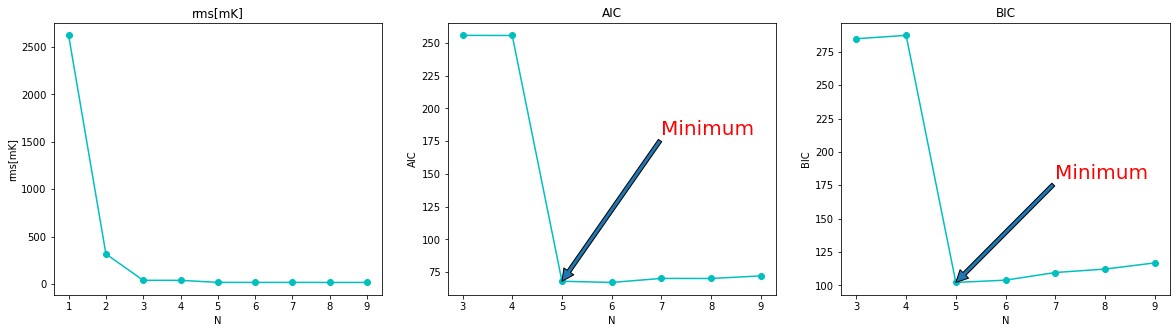

In [468]:
fig = plt.figure(figsize=(20,5))

ax = fig.add_subplot(131)
ax.plot(list(range(1, 10)), rms_list[:], marker = 'o', c = 'c')
ax.set_title('rms[mK]')
ax.set_xlabel('N')
ax.set_ylabel('rms[mK]')

ax = fig.add_subplot(132)
ax.plot( list(range(1, 10)) , AIC_list[:], marker = 'o', c = 'c')
ax.annotate("Minimum", xy = (5, AIC_list[4]), size = 20, xytext = (7, 180),color = "red", arrowprops = dict())
ax.set_title('AIC')
ax.set_xlabel('N')
ax.set_ylabel('AIC')

ax = fig.add_subplot(133)
ax.plot( list(range(1, 10)) , BIC_list[:], marker = 'o', c = 'c')
ax.annotate("Minimum", xy = (5, BIC_list[4]), size = 20, xytext = (7, 180),color = "red", arrowprops = dict())
ax.set_title('BIC')
ax.set_xlabel('N')
ax.set_ylabel('BIC')

fig.savefig("change n.png")

plt.show()

In [467]:
rms_list, AIC_list, BIC_list

([2622.7748056614173,
  315.5023071321055,
  37.66032692436296,
  37.490807702737875,
  15.966846373496455,
  15.403237583336384,
  15.615466994781704,
  15.209306992829196,
  15.207406435168144],
 [inf,
  inf,
  255.73587692342315,
  255.63639713116484,
  68.01414217732511,
  67.10040318242685,
  70.18529499985122,
  70.12203356450988,
  72.11250668782804],
 [inf,
  inf,
  284.71789579394914,
  287.2531449899205,
  102.26561902431038,
  103.98660901764174,
  109.70622982329576,
  112.27769737618405,
  116.90289948773187])